# Results of the SIB on openABM instances
We have 4 sets of partial observation of one epidemic cascade simulations made with openABM[link] framework. The four instances of partial observations are generated according to two differents fractions of infected (frac_inf=[0.2, 0.4]) and fraction of susceptible observed (frac susc = [0.1, 0.3]). For each instance we rank the not-observed individuals with the probability to have been infected, computed by SIB (message passing algorithm) and by a greedy algorithm based number of contacts with infected individuals.

In [1]:
import sys
sys.path.insert(0,'../../../lib/')
import pandas as pd
import numpy as np
import data_load

## Loads contacts list and partial observations

In [2]:
T_obs = 25
name = f"T_{T_obs}"
base_path = "../../../data/OpenABM/"
folder_data = base_path + name
params, contacts_df, true_conf, obs_list = data_load.load_instance(
    folder_data)
N = contacts_df[["i", "j"]].max().max() + 1

# ROC curves
In the left plots the ROC curve of infected individuals are shown for the four instances considered. In the right plots the number of infected individuals against number of tests is plotted.

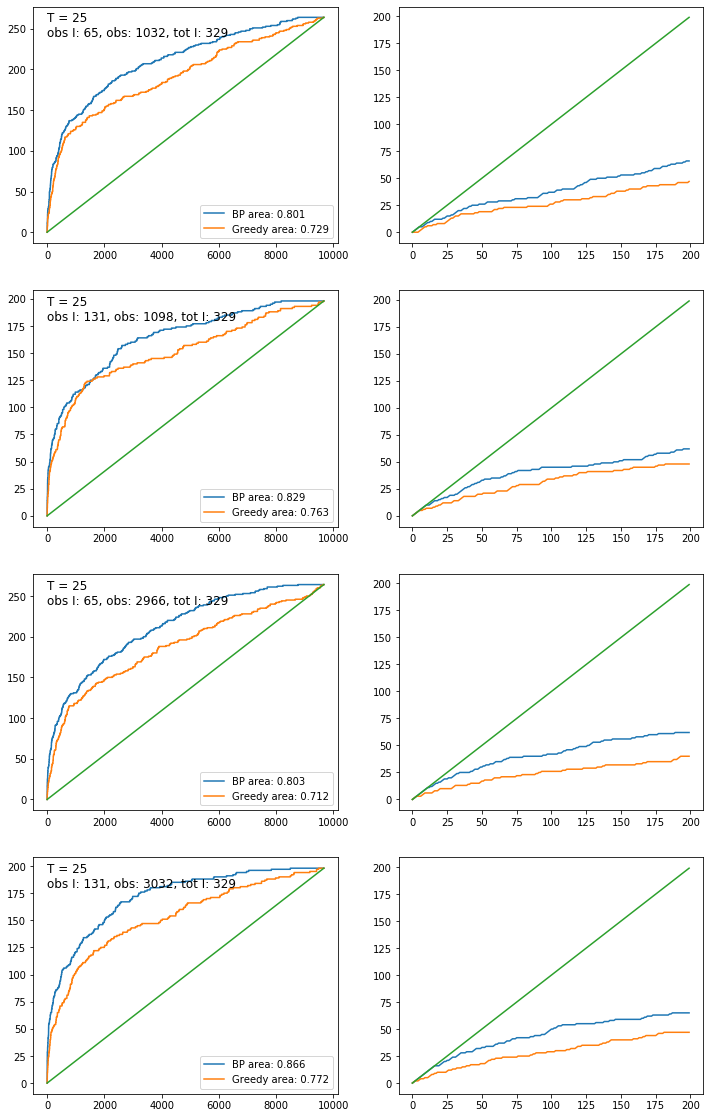

In [6]:
from matplotlib import pyplot as plt
import analysis_utils
num_i = 4
fig, axs = plt.subplots(num_i,2,
                   figsize=(12, 5*num_i))
n1=200
for obs_item in range(len(obs_list)):
    
    obs_df = obs_list[obs_item]

    observations = list(obs_df.to_records(index=False))
   
    I_obs = len(set(obs_df[obs_df["state"] == 1].values[:,0]))
    text = f"T = {T_obs}\n"
    text += f"obs I: {I_obs}, "
    text += f"obs: {len(obs_df)}, "
    tot_I = str(sum(true_conf[T_obs] == 1))
    text += f"tot I: {tot_I} "
    #fig.suptitle('Horizontally stacked subplots')
    events_I = analysis_utils.events_list(T_obs, 
                  observations, 
                  true_conf, 
                  check_fn = analysis_utils.check_fn_I)

    probas_I_BP = pd.read_csv(f"./BP_{obs_item}.csv")
    probas_I_BP = dict(zip(probas_I_BP.index, probas_I_BP.p_I + probas_I_BP.p_R))

    score_tracing = pd.read_csv(f"./Greedy_tracing_{obs_item}.csv")
    score_tracing = dict(zip(score_tracing.node, score_tracing["score"]))

    x,y,a, sortl = analysis_utils.roc_curve(probas_I_BP, 
                                              events_I, 
                                              ranker = lambda x: x)
    
    x_greedy, y_greedy, a_greedy, sortl_greedy = analysis_utils.roc_curve(
        score_tracing,                                                        
        events_I,
        ranker = lambda x: x)

    ax = axs[obs_item]
    ax[0].plot(x, y, label=f"BP area: {a:.3f}")
    ax[0].plot(x_greedy, y_greedy, label=f"Greedy area: {a_greedy:.3f}")
    ax[0].plot([0,x[-1]],[0,y[-1]])
    
    ax[1].plot(y[0:n1], label=f"BP area: {a:.3f}")
    ax[1].plot(y_greedy[0:n1], label=f"Greedy area: {a_greedy:.3f}")
    ax[1].plot(range(n1),range(n1))
    ax[0].legend(loc="lower right")

    ax[0].text(x[10]*1.5, y[-1]/1.1, text, fontsize=12)

plt.show()